In [1]:
###########################################################
#                                                         #
#                         CSV                             #
#                                                         #
#                         avec                            #
#                                                         #
#                          10/2018     Adrien Poindron    #
###########################################################

In [29]:
import pylab
import numpy as np
import scipy
import matplotlib

%matplotlib qt

In [2]:
from scipy.signal import decimate, periodogram, welch, windows, argrelextrema, find_peaks
from matplotlib import cm
from scipy.optimize import curve_fit
# cm = pylab.get_cmap('jet')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
matplotlib.rcParams['figure.figsize'] = [10.5,7]
matplotlib.rcParams.update({'font.size': 15})

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Myriad pro"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

In [4]:
matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Myriad Pro') 

In [5]:
%run /home/adrian/PycharmProjects/data_analysis/data_fct_Adrien.py

In [6]:
def gaussian_fit(x,A,mu,sigma):
    return A*exp(-(x-mu)**2/(2*sigma**2))
# 1/(sigma*sqrt(2*pi))*exp(-(x-mu)**2/(2*sigma**2))
# A * exp(-(x-mu)**2 / sigma)

def lorentzian_fit(x, *p):
    I, gamma, x0 = p
    return I / ((x - x0)**2 + gamma**2)

# Sélection fichiers

In [7]:
# sélection des fichiers donnée (Python 3)
file_path = load_file_GUI('/home/adrian/Documents/Mesures/')
filename = file_path
# print(file_path)

In [17]:
# sélection d'autres fichiers donnée (Python 3)
file_path_aux = load_file_GUI('/home/adrian/Documents/Mesures/')
filename_aux = file_path

print(file_path_aux)

data_dico_aux = {}
data_dico_aux = import_data(file_path_aux,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP_aux,CH_aux = convert_dico_to_var(data_dico_aux)

('/home/adrian/Documents/Mesures/GIANTMOL_DETECTION/mcp_piege/20191018/20191018_001.csv',)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 77: invalid continuation byte

In [8]:
file_path # 2 5 8 9

('/home/adrian/Documents/Mesures/Electrospray/20191105/WA000013.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000014.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000015.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000016.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000017.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000018.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000019.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000020.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000021.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000022.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000023.CSV',
 '/home/adrian/Documents/Mesures/Electrospray/20191105/WA000024.CSV')

# Importation des fichiers

In [11]:
the_col_to_read = (3,4,5)     # lecroy  (3,4,5) (0,1,2)     labview  (0,1)
the_row_to_skip = 11           # lecroy  11         2        labview  1
the_delim = ','               # lecroy  ','       ','       labview  '\t'

data_dico = {}
data_dico = import_data(file_path,
                        row_skip=the_row_to_skip,
                        col_to_read=the_col_to_read,
                        delim=the_delim)

TP,CH = convert_dico_to_var(data_dico)

In [76]:
# Conversion pts -> temps

conv_fact = 1
TP = [TP[k]*conv_fact for k in range(len(TP))]

In [14]:
# temps entre deux échantillons (si constant)
dt = [TP[k][590] - TP[k][589] for k in range(0,len(file_path))]
# sample_start = 50000
# sample_end = 25000*60+50000
for k in range(0,len(file_path)):
    print('{}{}{}{:.4e}{}'.format('dt[', k, '] = ',dt[k],'sec'))

dt[0] = 2.0000e-08sec
dt[1] = 2.0000e-08sec
dt[2] = 2.0000e-08sec
dt[3] = 2.0000e-08sec
dt[4] = 2.0000e-08sec
dt[5] = 2.0000e-08sec
dt[6] = 2.0000e-08sec
dt[7] = 2.0000e-08sec
dt[8] = 2.0000e-08sec
dt[9] = 2.0000e-08sec
dt[10] = 2.0000e-08sec
dt[11] = 2.0000e-08sec


# Affichage données

In [19]:
cl = [ cm.gist_rainbow(x) for x in linspace(0,1,len(TP))]

In [80]:
fig = figure('My plot')
fig.clf()
ax1 = fig.add_subplot(111)
ax1.plot(TP[0],CH[0,0])
ax1.set_xlabel('t [ms]')
ax1.set_ylabel('MCP piège [cts/1 ms]')
ax1.grid()
fig.set_size_inches(11.69, 5)
tight_layout()

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [41]:
# plot all
# start = 4000
# end = 33200
# sc = ['U1','U7','U111']
my_order = [4,3,2,1,0,5,6,7,8,11,10,9]
my_label = ['15.55/16.20','14.05/14.66','12.85/13.50', '11.63/12.23', '5.35/5.98','17.75/18.00','18.40/18.75','23.45/23.80','25.95/26.52','36.30/36.70','31.05/31.30','28.55,28.65']
fig,ax = plt.subplots(1,1,num='MCP Bender',clear=True)
# fig.suptitle('Tension C12 lentille centre | 0/X/0')
# clf()
fig.set_size_inches(11.69,8.27)

# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
# cl = [ cm.cool(x) for x in linspace(0,1,len(TP)) ]
cnt = 0
for to_plot in my_order:
    print(file_path[to_plot])
    ax.plot(TP[to_plot]*1e6, CH[to_plot,0]*1000,color=cl[cnt],marker='',ms=2,ls='-',lw=0.5, label = f'{my_label[to_plot]} µs')
    ax.set_xlabel('[µs]')
    ax.set_ylabel('[mV]')    
    ax.set_xlim(-0,70)
    ax.set_ylim(-10.5,3)
    leg = ax.legend(loc=4)
    # ax1.set_ylim(0,4)

    cnt += 1
# ax1.set_xlim(-3,128)
# ax1.set_ylim(-7,1.5)
ax.grid()
plt.tight_layout()
# fig.subplots_adjust(hspace=0.020, wspace=0.020,top=0.94)

/home/adrian/Documents/Mesures/Electrospray/20191105/WA000017.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000016.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000015.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000014.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000013.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000018.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000019.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000020.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000021.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000024.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000023.CSV
/home/adrian/Documents/Mesures/Electrospray/20191105/WA000022.CSV


/home/adrian/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


/home/adrian/Documents/Mesures/GIANTMOL_DETECTION/mcp_piege/20191018/test.csv


TypeError: list indices must be integers or slices, not tuple

/home/adrian/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


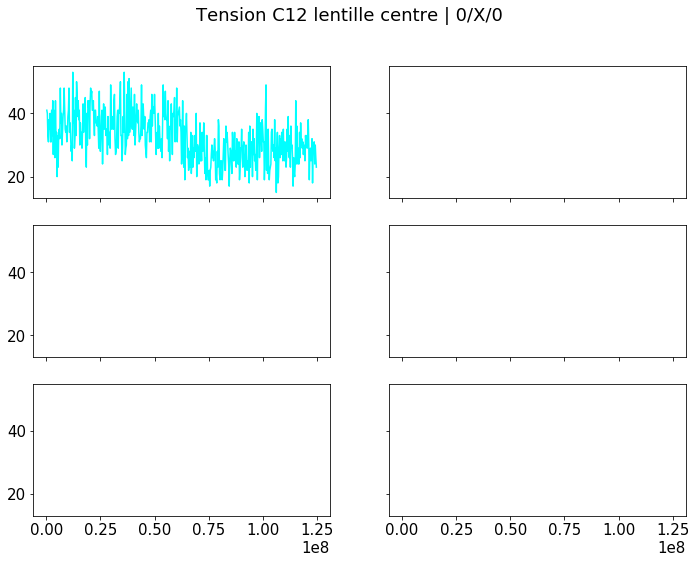

In [46]:
# plot all
# start = 4000
# end = 33200
# sc = ['U1','U7','U111']

my_label = ['20', '50', '80', '110', '140']

fig,ax = plt.subplots(3,2, sharex=True, sharey=True,num='Tension C12 lentille',clear=True)
fig.suptitle('Tension C12 lentille centre | 0/X/0')
# clf()
fig.set_size_inches(11.69,8.27)

# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.cool(x) for x in linspace(0,1,5) ]
cnt = 0
for patate in range(5):
    print(file_path[patate])
    k = patate % 3
    l = cnt//3
    ax[k,l].plot(TP[patate]*1000000, CH[patate,0],color=cl[cnt],marker='',ms=2,ls='-',label = f'{int(my_label[cnt]):02.0f} V')
    ax[k,l].plot(TP[0,:1800]*1000000, 0.01-CH[0,1,:1800]/100-0.018,color='xkcd:black',marker='',ms=2,ls='-')
    ax[k,l].set_xlabel('[µs]')
    ax[1,0].set_ylabel('[V]')    
    ax[1,0].set_xlim(-20,150)
    # ax1.set_xlim(-10.5,11)
    # ax1.set_ylim(0,4)
    ax[k,l].grid()
    leg = ax[k,l].legend(loc=4)
    leg.get_title().set_fontsize(15)
    cnt += 1

# ax1.set_xlim(-3,128)
# ax1.set_ylim(-7,1.5)
plt.tight_layout()
fig.subplots_adjust(hspace=0.020, wspace=0.020,top=0.94)



In [177]:
# plot all
# start = 4000
# end = 33200
# sc = ['U1','U7','U111']

my_label = ['0','20','40','60','80']

fig,ax = plt.subplots(3,2, sharex=True, sharey=True,num='Tension C13 lentille',clear=True)
fig.suptitle('Tension C13 lentille après | 0/20/X')
# clf()
fig.set_size_inches(11.69,8.27)

# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.hot(x) for x in linspace(0,1,9)]
cnt = 0
for patate in range(5,10):
    print(file_path[patate])
    k = (patate-5) % 3
    l = cnt//3
    ax[k,l].plot(TP[patate]*1000000, CH[patate,0],color=cl[cnt+1],marker='',ms=2,ls='-',label = f'{int(my_label[cnt]):02.0f} V')
    ax[k,l].plot(TP[0,:1800]*1000000, 0.01-CH[0,1,:1800]/200-0.018,color='xkcd:black',marker='',ms=2,ls='-')
    ax[k,l].set_xlabel('[µs]')
    ax[1,0].set_ylabel('[V]')    
    ax[1,0].set_xlim(-20,150)
    # ax1.set_xlim(-10.5,11)
    # ax1.set_ylim(0,4)
    ax[k,l].grid()
    leg = ax[k,l].legend(loc=4)
    leg.get_title().set_fontsize(15)
    cnt += 1

# ax1.set_xlim(-3,128)
# ax1.set_ylim(-7,1.5)
plt.tight_layout()
fig.subplots_adjust(hspace=0.020, wspace=0.020,top=0.94)



/home/adrian/Documents/Mesures/Electrospray/190703/WA000006.CSV
/home/adrian/Documents/Mesures/Electrospray/190703/WA000007.CSV
/home/adrian/Documents/Mesures/Electrospray/190703/WA000008.CSV
/home/adrian/Documents/Mesures/Electrospray/190703/WA000009.CSV
/home/adrian/Documents/Mesures/Electrospray/190703/WA000010.CSV


/home/adrian/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [175]:
# plot all
# start = 4000
# end = 33200
# sc = ['U1','U7','U111']

my_label = ['0','20','40','60','80','100','120','130','140']

fig,ax = plt.subplots(3,3, sharex=True, sharey=True,num='Tension lentille C11',clear=True)
fig.suptitle('Tension C11 lentille avant | X/20/0')
# clf()
fig.set_size_inches(11.69,8.27)

# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.winter(x) for x in linspace(0,1,10)]
cnt = 0
for patate in range(10,19):
    print(file_path[patate])
    k = (patate-10) % 3
    l = cnt//3
    print(patate,k,l)
    ax[k,l].plot(TP[patate]*1000000, CH[patate,0],color=cl[cnt+1],marker='',ms=2,ls='-',label = f'{int(my_label[cnt]):02.0f} V')
    ax[k,l].plot(TP[0,:1800]*1000000, 0.01-CH[0,1,:1800]/100-0.018,color='xkcd:black',marker='',ms=2,ls='-')
    ax[2,1].set_xlabel('[µs]')
    ax[1,0].set_ylabel('[V]')    
#     ax[1,0].set_xlim(-0.05,0.01)
    ax[1,0].set_xlim(-20,150)
    ax[k,l].grid()
    leg = ax[k,l].legend(loc=4)
    leg.get_title().set_fontsize(15)
    cnt += 1

# ax1.set_xlim(-3,128)
# ax1.set_ylim(-7,1.5)
plt.tight_layout()
fig.subplots_adjust(hspace=0.020, wspace=0.020,top=0.94)



/home/adrian/Documents/Mesures/Electrospray/190703/WA000011.CSV
10 0 0
/home/adrian/Documents/Mesures/Electrospray/190703/WA000012.CSV
11 1 0
/home/adrian/Documents/Mesures/Electrospray/190703/WA000013.CSV
12 2 0
/home/adrian/Documents/Mesures/Electrospray/190703/WA000014.CSV
13 0 1
/home/adrian/Documents/Mesures/Electrospray/190703/WA000015.CSV
14 1 1
/home/adrian/Documents/Mesures/Electrospray/190703/WA000016.CSV
15 2 1
/home/adrian/Documents/Mesures/Electrospray/190703/WA000017.CSV
16 0 2
/home/adrian/Documents/Mesures/Electrospray/190703/WA000018.CSV
17 1 2
/home/adrian/Documents/Mesures/Electrospray/190703/WA000019.CSV
18 2 2


/home/adrian/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [64]:
# trace ES diff pulses
# start = 4000
# end = 33200
# sc = ['U1','U7','U111']

my_label = ['5', '10', '15', '20', '25']

fig = plt.figure('all_pulses')
clf()
fig.set_size_inches(11.69,8.27)

ax1 = fig.add_subplot(111)


# title('Scans 866')
# ax2 = fig.add_subplot(212,sharex=ax1)
cl = [ cm.hsv(x) for x in linspace(0,1,6)]
cnt = 0
for k in [3,2,5,6,7]:
    ax1.plot(TP[k]*1000000, CH[k,0]*1000,color=cl[cnt],marker='',ms=2,ls='-',label = f'{int(my_label[cnt]):02.0f} µs')
    ax1.plot(TP[k]*1000000, CH[k,1]/1.5-6.5,color=cl[cnt],marker='',ms=2,ls='-')
    cnt += 1
ax1.set_xlabel('[µs]')
ax1.set_ylabel('MCP signal [mV]')
leg = ax1.legend(title='$T_{pulse}$')
leg.get_title().set_fontsize(20)
ax1.set_xlim(-3,128)
ax1.set_ylim(-7,1.5)

grid()
plt.tight_layout()


In [36]:
'{:5.5f}'.format(my_label[2])

ValueError: Unknown format code 'f' for object of type 'str'

In [ ]:

# ax1.set_xlim(-0.5,130)
# ax1.set_ylim(3000,15500)
# ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=5))
ax1.grid()

plt.tight_layout()



for k in range(3):
    ax[k].plot(TP[k,start:end],CH[k,1,start:end]/10,color='xkcd:rouge',label='ramp (/10)')
    ax[k].plot(TP[k,start:end],CH[k,0,start:end],color='xkcd:azul',label=sc[k]+' pin1')
    ax[k].set_xlabel('[s]')
    ax[k].set_ylabel('[V]')    
    # ax1.set_xlim(-10.5,11)
    # ax1.set_ylim(0,4)
    ax[k].grid()
    ax[k].legend(loc=6)
#     ax[k].annotate('{}'.format(sc[k]), xy=(-4.58,0.26), xycoords='data',
#             size=13, ha='left', va='top',
#             bbox=dict(boxstyle='round', fc='w'))
    
plt.text(4,0.82,f'Amplitude varies with SPAN',
        va="baseline", ha="right", multialignment="left",
         color='xkcd:azul',bbox=dict(fc="white"))
plt.text(2.8,0.52,f'Amplitude varies with SPAN',
        va="baseline", ha="right", multialignment="left",
         color='xkcd:azul',bbox=dict(fc="white"))
ax[k].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
ax[k].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.05))


plt.tight_layout()
plt.subplots_adjust(hspace=0.020, top=0.94)

In [12]:
# trace potentiel
start = 4000
end = 33200
sc = ['U1','U7','U111']

fig,ax = plt.subplots(3,1, sharex=True, sharey=True,num=542,clear=True)

plt.suptitle('CEL diagnostics')
fig.set_size_inches(11.69,8.27)

for k in range(3):
    ax[k].plot(TP[k,start:end],CH[k,1,start:end]/10,color='xkcd:rouge',label='ramp (/10)')
    ax[k].plot(TP[k,start:end],CH[k,0,start:end],color='xkcd:azul',label=sc[k]+' pin1')
    ax[k].set_xlabel('[s]')
    ax[k].set_ylabel('[V]')    
    # ax1.set_xlim(-10.5,11)
    # ax1.set_ylim(0,4)
    ax[k].grid()
    ax[k].legend(loc=6)
#     ax[k].annotate('{}'.format(sc[k]), xy=(-4.58,0.26), xycoords='data',
#             size=13, ha='left', va='top',
#             bbox=dict(boxstyle='round', fc='w'))
    
plt.text(4,0.82,f'Amplitude varies with SPAN',
        va="baseline", ha="right", multialignment="left",
         color='xkcd:azul',bbox=dict(fc="white"))
plt.text(2.8,0.52,f'Amplitude varies with SPAN',
        va="baseline", ha="right", multialignment="left",
         color='xkcd:azul',bbox=dict(fc="white"))
ax[k].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
ax[k].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.05))


plt.tight_layout()
plt.subplots_adjust(hspace=0.020, top=0.94)

ValueError: Image size of 6498251x581 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 841.68x595.44 with 3 Axes>

In [33]:
# trace potentiel
fig,ax = plt.subplots(3,1, sharex=True, num=542,clear=True)

plt.suptitle('MCP signals')
fig.set_size_inches(11.69,8.27)

for k in range(3):
    ax[k].plot(TP[k,0:-1000],CH[k,0,0:-1000]/10,color='xkcd:vermillion')
    ax[k].plot(TP[k,0:-1000],-CH[k,1,0:-1000]/1000,color='xkcd:azul')
    ax[k].set_xlabel('[s]')
    ax[k].set_ylabel('[V]')    
    # ax1.set_xlim(-10.5,11)
    # ax1.set_ylim(0,4)
    ax[k].grid()
#     ax[k].annotate('{}'.format(sc[k]), xy=(-4.58,0.26), xycoords='data',
#             size=13, ha='left', va='top',
#             bbox=dict(boxstyle='round', fc='w'))
    
# plt.text(4,0.82,f'Amplitude varies with SPAN',
#         va="baseline", ha="right", multialignment="left",
#          color='xkcd:azul',bbox=dict(fc="white"))
# plt.text(2.8,0.52,f'Amplitude varies with SPAN',
#         va="baseline", ha="right", multialignment="left",
#          color='xkcd:azul',bbox=dict(fc="white"))
# ax[k].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
# ax[k].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.05))


plt.tight_layout()
plt.subplots_adjust(hspace=0.020, top=0.94)